In [42]:
import torch
from torch import nn, optim, einsum
import torchvision
from torchvision import transforms
from einops import rearrange, reduce, repeat
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [11]:
def imshow(img, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    if len(img.shape) == 4:
        img = img.squeeze(0)
    img_reshaped = rearrange(img, 'c w h -> w h c')
    plt.imshow(img_reshaped.detach())
    plt.xticks([])
    plt.yticks([])


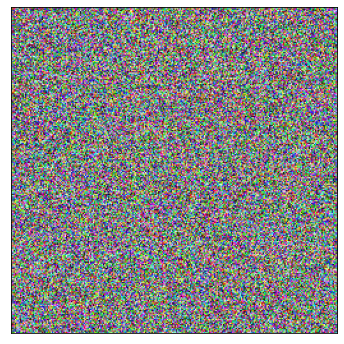

In [15]:
img = nn.Parameter(torch.rand((1, 3, 256, 256)))
imshow(img)

In [13]:
rnet = torchvision.models.resnet34(pretrained=True)

for param in rnet.parameters():
    if param.requires_grad:
        #print(type(param), param.dtype, param.shape)
        param.requires_grad = False

In [23]:
optimizer = optim.Adam([img], lr = 0.05)

for i in range(50):
    optimizer.zero_grad()
    l = -rnet(img)[0,50]
    l.backward()
    optimizer.step()
 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


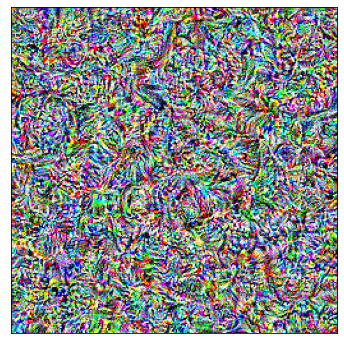

In [24]:
imshow(img)

In [34]:
img = nn.Parameter(torch.randn((1, 3, 256, 256)))

optimizer = optim.Adam([img], lr = 0.05)

for i in range(200):
    optimizer.zero_grad()
    img_sig = torch.sigmoid(img)
    l = -rnet(img_sig)[0,50]
    l.backward()
    optimizer.step()





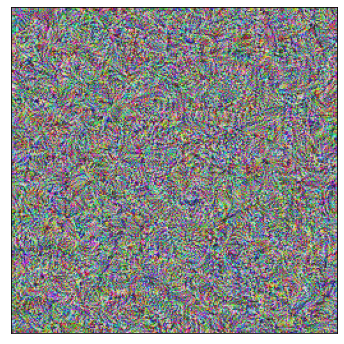

In [36]:
torch.mean(img)
imshow(torch.sigmoid(img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

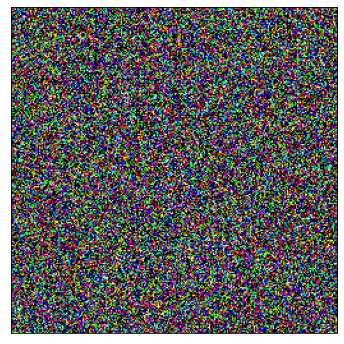

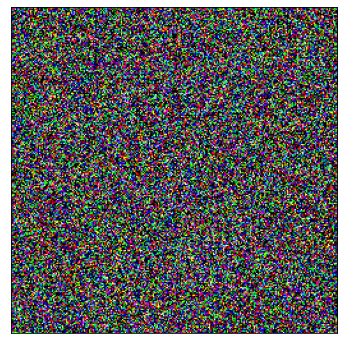

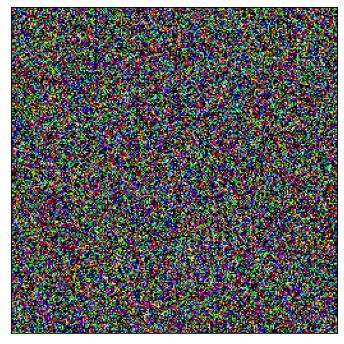

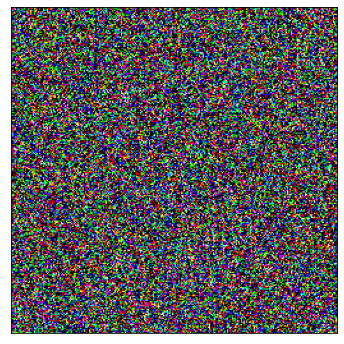

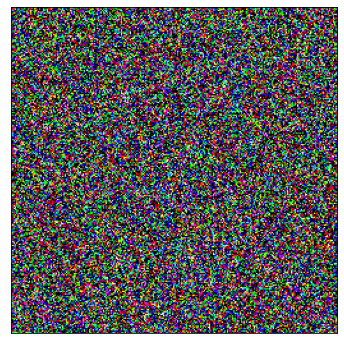

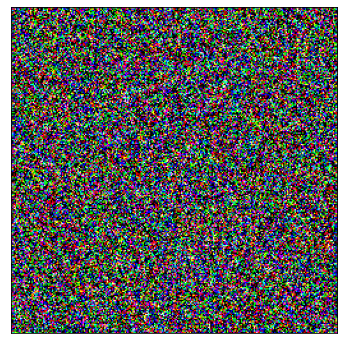

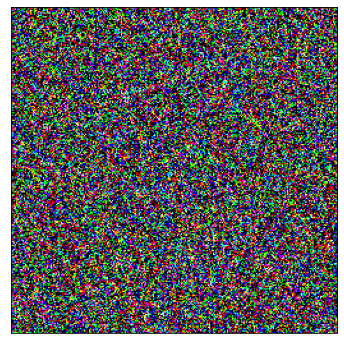

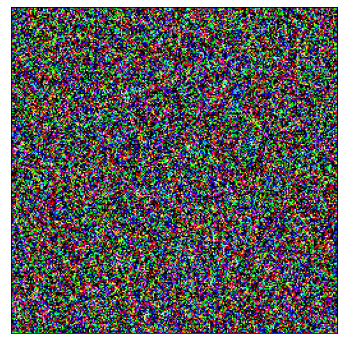

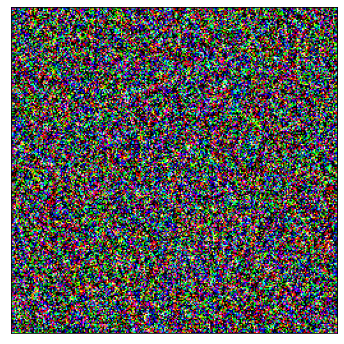

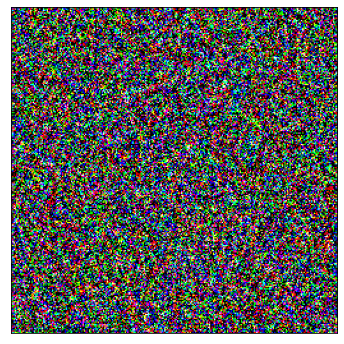

In [47]:
img = nn.Parameter(torch.randn((1, 3, 256, 256)))

ts = transforms.Compose([
    transforms.ColorJitter(0.5, 0.5),
    transforms.RandomRotation(degrees=(-20, 20)),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(2, 5))
])

optimizer = optim.Adam([img], lr = 0.1)

for i in range(10):
    optimizer.zero_grad()
    img_trans = ts(img)
    imshow(img)
    l = -rnet(torch.sigmoid(img_trans))[0,50]
    l.backward()
    #print(l)
    optimizer.step()

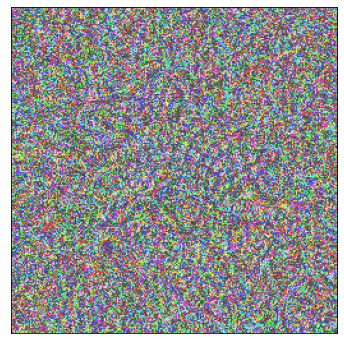

In [46]:
torch.mean(img)
imshow(torch.sigmoid(img))

In [21]:
img.requires_grad

True